In [1]:
import getopt
import random
import sys
import time
from collections import deque
# make sure the root path is in system path
from pathlib import Path

from flatland.envs.malfunction_generators import malfunction_from_params
# base_dir = Path(__file__).resolve().parent.parent
# sys.path.append(str(base_dir))

import matplotlib.pyplot as plt
import numpy as np
import torch
from double_duelling_dqn import Agent
from observation_utils import normalize_observation

from flatland.envs.rail_generators import complex_rail_generator, rail_from_manual_specifications_generator, random_rail_generator , sparse_rail_generator
from flatland.envs.schedule_generators import complex_schedule_generator, sparse_schedule_generator
from flatland.envs.rail_env import RailEnv
from flatland.utils.rendertools import RenderTool
from flatland.envs.observations import TreeObsForRailEnv,GlobalObsForRailEnv,LocalObsForRailEnv
from flatland.envs.predictions import ShortestPathPredictorForRailEnv
from flatland.utils.ordered_set import OrderedSet
from flatland.core.grid.grid4_utils import get_new_position



cpu


In [2]:
%matplotlib notebook
plt.ion()

In [3]:
Global_observations = GlobalObsForRailEnv()
Tree_observations = TreeObsForRailEnv(max_depth=2)

In [4]:
def environment1 ():
    transition_probability = [1.0,  # empty cell - Case 0
                          1.0,  # Case 1 - straight
                          1.0,  # Case 2 - simple switch
                          0.3,  # Case 3 - diamond drossing
                          0.5,  # Case 4 - single slip
                          0.5,  # Case 5 - double slip
                          0.2,  # Case 6 - symmetrical
                          0.0,  # Case 7 - dead end
                          0.2,  # Case 8 - turn left
                          0.2,  # Case 9 - turn right
                          1.0]  # Case 10 - mirrored switch

    # Example generate a random rail
    env = RailEnv(width=10,
                  height=10,
                  rail_generator=random_rail_generator(
                            cell_type_relative_proportion=transition_probability
                            ),
                  number_of_agents=1,
                  obs_builder_object= Tree_observations )
    return env

In [5]:
def environment2 ():
     #fix the randomness
    random.seed(1)
    np.random.seed(1)
    
    x_dim = 35
    y_dim = 35
    n_agents = 1

    stochastic_data = {'malfunction_rate': 8000,  # Rate of malfunction occurence of single agent
                       'min_duration': 15,  # Minimal duration of malfunction
                       'max_duration': 50  # Max duration of malfunction
                       }

    TreeObservation = TreeObsForRailEnv(max_depth=2)
    speed_ration_map = {1.: 0.,  # Fast passenger train
                        1. / 2.: 1.0,  # Fast freight train
                        1. / 3.: 0.0,  # Slow commuter train
                        1. / 4.: 0.0}  # Slow freight train
    
    env = RailEnv(width=x_dim,
                  height=y_dim,
                  rail_generator=sparse_rail_generator(max_num_cities=5,
                                                       # Number of cities in map (where train stations are)
                                                       seed=1,  # Random seed
                                                       grid_mode=False,
                                                       max_rails_between_cities=2,
                                                       max_rails_in_city=3),
                  schedule_generator=sparse_schedule_generator(),
                  number_of_agents=n_agents,
                  malfunction_generator_and_process_data=malfunction_from_params(stochastic_data),
                  # Malfunction data generator
                  obs_builder_object=TreeObservation)

    return env

    

<IPython.core.display.Javascript object>


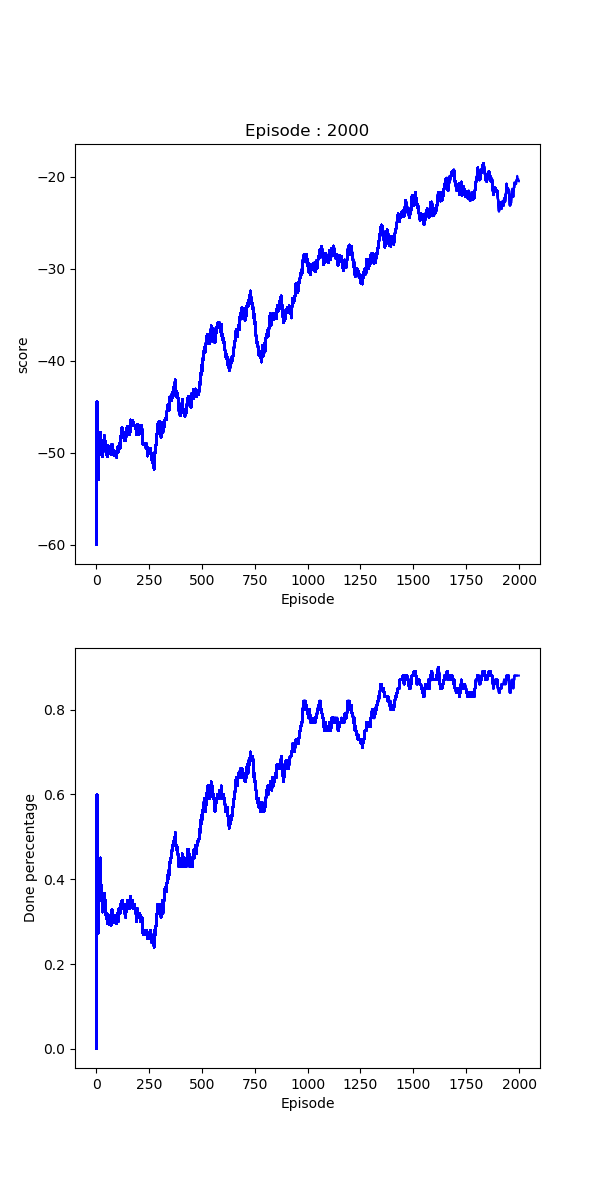

Training 1 Agents on (10,10).	 Episode 10	 Average Score: -52.200	Dones: 30.00%	Epsilon: 0.98 	 Action Probabilities: 	 [0.17613636 0.18371212 0.21590909 0.19128788 0.23295455] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 6) -> (7, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 13	 Average Score: -51.308	Dones: 30.77%	Epsilon: 0.97 	 Action Probabilities: 	 [0.18222222 0.18518519 0.20888889 0.19851852 0.22518519] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 14	 Average Score: -47.786	Dones: 35.71%	Epsilon: 0.97 	 Action Probabilities: 	 [0.18409426 0.18409426 0.20765832 0.20029455 0.22385862] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 7) -> (1, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 37	 Average Score: -48.595	Dones: 35.14%	Epsilon: 0.93 	 Action Probabilities: 	 [0.19133772 0.20065789 0.20833333 0.20065789 0.19901316] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 8) -> (1, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 56	 Average Score: -49.875	Dones: 30.36%	Epsilon: 0.89 	 Action Probabilities: 	 [0.18500177 0.20481075 0.19596746 0.21330032 0.2009197 ] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 57	 Average Score: -49.211	Dones: 31.58%	Epsilon: 0.89 	 Action Probabilities: 	 [0.18549806 0.20450546 0.19640971 0.21295319 0.20063358] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 4) -> (7, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 58	 Average Score: -49.397	Dones: 31.03%	Epsilon: 0.89 	 Action Probabilities: 	 [0.18717684 0.20337815 0.19648397 0.21268528 0.20027577] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 8) -> (8, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 71	 Average Score: -50.056	Dones: 29.58%	Epsilon: 0.87 	 Action Probabilities: 	 [0.18576196 0.19688543 0.19243604 0.22246941 0.20244716] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 3) -> (3, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 86	 Average Score: -50.140	Dones: 30.23%	Epsilon: 0.84 	 Action Probabilities: 	 [0.18813016 0.19385885 0.19156737 0.21746104 0.20898258] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 1) -> (4, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 89	 Average Score: -50.213	Dones: 30.34%	Epsilon: 0.84 	 Action Probabilities: 	 [0.18859164 0.19301349 0.1925713  0.21556489 0.21025868] re_generate cnt=2
re_generate cnt=3
re_generate cnt=4


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 3) -> (7, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 0) -> (3, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 4) -> (6, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 90	 Average Score: -50.322	Dones: 30.00%	Epsilon: 0.84 	 Action Probabilities: 	 [0.18765001 0.19332315 0.19397774 0.21470652 0.21034257] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 2) -> (6, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 96	 Average Score: -50.271	Dones: 30.21%	Epsilon: 0.83 	 Action Probabilities: 	 [0.18775594 0.19410319 0.19185094 0.21294021 0.21334971] re_generate cnt=2
re_generate cnt=3


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 0) -> (6, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 6) -> (5, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 99	 Average Score: -50.020	Dones: 30.30%	Epsilon: 0.82 	 Action Probabilities: 	 [0.18754988 0.19253791 0.19393456 0.21169194 0.21428571] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 1) -> (4, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 106	 Average Score: -49.680	Dones: 31.00%	Epsilon: 0.81 	 Action Probabilities: 	 [0.18804062 0.19086123 0.19481008 0.21060549 0.21568259] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 1) -> (5, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 111	 Average Score: -49.210	Dones: 33.00%	Epsilon: 0.80 	 Action Probabilities: 	 [0.18762332 0.19013453 0.19820628 0.20789238 0.2161435 ] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 112	 Average Score: -48.960	Dones: 33.00%	Epsilon: 0.80 	 Action Probabilities: 	 [0.18755603 0.19006634 0.19849381 0.20781782 0.21606599] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (6, 7) -> (0, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 113	 Average Score: -48.960	Dones: 33.00%	Epsilon: 0.80 	 Action Probabilities: 	 [0.18733369 0.19034948 0.19780025 0.20862161 0.21589498] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 1) -> (3, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 114	 Average Score: -49.540	Dones: 32.00%	Epsilon: 0.80 	 Action Probabilities: 	 [0.18694049 0.19045111 0.19764788 0.20870634 0.21625417] re_generate cnt=2
re_generate cnt=3
re_generate cnt=4
Training 1 Agents on (10,10).	 Episode 115	 Average Score: -49.230	Dones: 32.00%	Epsilon: 0.79 	 Action Probabilities: 	 [0.18672489 0.19021834 0.19877729 0.20838428 0.2158952 ] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 3) -> (6, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 8) -> (1, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 3) -> (9, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 119	 Average Score: -48.040	Dones: 33.00%	Epsilon: 0.79 	 Action Probabilities: 	 [0.18727429 0.1900258  0.19948409 0.2072227  0.21599312] re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 120	 Average Score: -47.840	Dones: 33.00%	Epsilon: 0.79 	 Action Probabilities: 	 [0.18736047 0.19027992 0.19938176 0.20710974 0.21586811] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 3) -> (9, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 4) -> (6, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 150	 Average Score: -47.460	Dones: 34.00%	Epsilon: 0.74 	 Action Probabilities: 	 [0.18247577 0.18779855 0.1970793  0.20676948 0.22587689] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 3) -> (4, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 212	 Average Score: -47.690	Dones: 30.00%	Epsilon: 0.65 	 Action Probabilities: 	 [0.17095906 0.19594465 0.19133192 0.20132616 0.24043821] re_generate cnt=2
re_generate cnt=3
re_generate cnt=4
re_generate cnt=5
Training 1 Agents on (10,10).	 Episode 213	 Average Score: -47.110	Dones: 31.00%	Epsilon: 0.65 	 Action Probabilities: 	 [0.17098943 0.19606148 0.19125841 0.20134486 0.24034582] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 5) -> (8, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 7) -> (6, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 8) -> (4, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (7, 6) -> (3, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i

Training 1 Agents on (10,10).	 Episode 233	 Average Score: -48.990	Dones: 28.00%	Epsilon: 0.63 	 Action Probabilities: 	 [0.17157757 0.19408953 0.18757062 0.20017384 0.24658844] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 2) -> (1, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 234	 Average Score: -48.990	Dones: 28.00%	Epsilon: 0.63 	 Action Probabilities: 	 [0.17146563 0.19377432 0.18728923 0.20043234 0.24703848] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 6) -> (7, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 241	 Average Score: -49.150	Dones: 28.00%	Epsilon: 0.62 	 Action Probabilities: 	 [0.1711742  0.19376785 0.18646061 0.2009911  0.24760625] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (6, 5) -> (7, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 283	 Average Score: -49.500	Dones: 28.00%	Epsilon: 0.57 	 Action Probabilities: 	 [0.17227312 0.19474664 0.18186373 0.19832522 0.2527913 ] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 284	 Average Score: -49.120	Dones: 29.00%	Epsilon: 0.57 	 Action Probabilities: 	 [0.1722635  0.19476993 0.18169477 0.19827093 0.25300086] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (6, 7) -> (0, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 294	 Average Score: -47.520	Dones: 32.00%	Epsilon: 0.56 	 Action Probabilities: 	 [0.17220523 0.19466073 0.18117353 0.19723304 0.25472747] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (7, 2) -> (6, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 310	 Average Score: -47.840	Dones: 32.00%	Epsilon: 0.54 	 Action Probabilities: 	 [0.170411   0.1955861  0.18012422 0.1958504  0.25802828] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 1) -> (7, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 7) -> (7, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 320	 Average Score: -47.150	Dones: 35.00%	Epsilon: 0.53 	 Action Probabilities: 	 [0.16884707 0.19617194 0.1805117  0.19617194 0.25829735] re_generate cnt=2
re_generate cnt=3


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 5) -> (0, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 2) -> (8, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 328	 Average Score: -46.300	Dones: 38.00%	Epsilon: 0.52 	 Action Probabilities: 	 [0.16804875 0.19663274 0.18055032 0.19499937 0.25976882] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 4) -> (6, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 352	 Average Score: -44.330	Dones: 44.00%	Epsilon: 0.49 	 Action Probabilities: 	 [0.16832617 0.19955223 0.17781182 0.19548695 0.25882284] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 5) -> (1, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 355	 Average Score: -44.250	Dones: 45.00%	Epsilon: 0.49 	 Action Probabilities: 	 [0.16825101 0.1997434  0.17723217 0.19601096 0.25876247] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 4) -> (3, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 368	 Average Score: -42.850	Dones: 49.00%	Epsilon: 0.48 	 Action Probabilities: 	 [0.16827766 0.20072353 0.17483466 0.19778418 0.25837997] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 2) -> (8, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 397	 Average Score: -45.700	Dones: 43.00%	Epsilon: 0.45 	 Action Probabilities: 	 [0.16672768 0.20103551 0.17368338 0.19685163 0.26170179] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 2) -> (6, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 417	 Average Score: -45.500	Dones: 45.00%	Epsilon: 0.43 	 Action Probabilities: 	 [0.16653355 0.20122804 0.1733726  0.19678514 0.26208067] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 418	 Average Score: -45.870	Dones: 45.00%	Epsilon: 0.43 	 Action Probabilities: 	 [0.16630981 0.20151372 0.17333068 0.19673356 0.26211223] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 8) -> (8, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 419	 Average Score: -45.930	Dones: 44.00%	Epsilon: 0.43 	 Action Probabilities: 	 [0.16606265 0.20155885 0.17326118 0.19654471 0.26257261] re_generate cnt=2
re_generate cnt=3


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 4) -> (4, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 8) -> (3, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 420	 Average Score: -46.000	Dones: 43.00%	Epsilon: 0.43 	 Action Probabilities: 	 [0.16616344 0.20170272 0.1730931  0.19645597 0.26258476] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 1) -> (8, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 429	 Average Score: -44.980	Dones: 44.00%	Epsilon: 0.42 	 Action Probabilities: 	 [0.16548337 0.20161447 0.17336121 0.19670298 0.26283797] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 2) -> (2, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 435	 Average Score: -44.230	Dones: 47.00%	Epsilon: 0.42 	 Action Probabilities: 	 [0.16560081 0.20123095 0.17238063 0.19796124 0.26282637] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 436	 Average Score: -43.900	Dones: 47.00%	Epsilon: 0.42 	 Action Probabilities: 	 [0.16557692 0.20129808 0.17235577 0.19798077 0.26278846] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 5) -> (1, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 446	 Average Score: -44.650	Dones: 44.00%	Epsilon: 0.41 	 Action Probabilities: 	 [0.16493878 0.2011071  0.17450861 0.19744805 0.26199747] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 447	 Average Score: -44.610	Dones: 44.00%	Epsilon: 0.41 	 Action Probabilities: 	 [0.16496248 0.2010788  0.17448405 0.19751407 0.2619606 ] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 8) -> (9, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 486	 Average Score: -43.550	Dones: 49.00%	Epsilon: 0.38 	 Action Probabilities: 	 [0.16238796 0.2028109  0.17391872 0.19898181 0.26190062] re_generate cnt=2
re_generate cnt=3
re_generate cnt=4
re_generate cnt=5
re_generate cnt=6
re_generate cnt=7
re_generate cnt=8
re_generate cnt=9
re_generate cnt=10
re_generate cnt=11
re_generate cnt=12


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 8) -> (1, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 1) -> (5, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (6, 6) -> (6, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 8) -> (1, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i

Training 1 Agents on (10,10).	 Episode 500	 Average Score: -40.500	Dones: 55.00%	Epsilon: 0.37 	 Action Probabilities: 	 [0.1634968  0.20315565 0.1733049  0.19880597 0.26123667] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 2) -> (7, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 0) -> (1, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 557	 Average Score: -37.090	Dones: 60.00%	Epsilon: 0.33 	 Action Probabilities: 	 [0.16022251 0.20699651 0.17358091 0.19947507 0.259725  ] re_generate cnt=2
re_generate cnt=3


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 3) -> (9, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 8) -> (4, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 569	 Average Score: -36.990	Dones: 58.00%	Epsilon: 0.32 	 Action Probabilities: 	 [0.15912414 0.20918956 0.17251597 0.19949203 0.25967829] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 570	 Average Score: -36.630	Dones: 59.00%	Epsilon: 0.32 	 Action Probabilities: 	 [0.15900354 0.20928802 0.17234353 0.19948485 0.25988006] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 1) -> (8, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 596	 Average Score: -37.230	Dones: 60.00%	Epsilon: 0.30 	 Action Probabilities: 	 [0.15880665 0.20997646 0.17124044 0.20243526 0.2575412 ] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 8) -> (0, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 598	 Average Score: -37.110	Dones: 60.00%	Epsilon: 0.30 	 Action Probabilities: 	 [0.15861892 0.20995083 0.17135099 0.20206208 0.25801717] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 2) -> (0, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 618	 Average Score: -39.480	Dones: 57.00%	Epsilon: 0.29 	 Action Probabilities: 	 [0.15768697 0.20943135 0.17024076 0.20235428 0.26028664] re_generate cnt=2
re_generate cnt=3


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 5) -> (8, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 3) -> (8, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 660	 Average Score: -37.560	Dones: 62.00%	Epsilon: 0.27 	 Action Probabilities: 	 [0.15583316 0.21223509 0.16907035 0.20278963 0.26007177] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 7) -> (4, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 671	 Average Score: -36.980	Dones: 63.00%	Epsilon: 0.26 	 Action Probabilities: 	 [0.15518108 0.21303896 0.16828034 0.20389293 0.25960669] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 673	 Average Score: -36.180	Dones: 65.00%	Epsilon: 0.26 	 Action Probabilities: 	 [0.15552136 0.21299301 0.16819991 0.20382698 0.25945874] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 9) -> (6, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 687	 Average Score: -35.440	Dones: 64.00%	Epsilon: 0.25 	 Action Probabilities: 	 [0.15468996 0.21334735 0.16730163 0.20401997 0.26064109] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 2) -> (6, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 707	 Average Score: -35.560	Dones: 63.00%	Epsilon: 0.24 	 Action Probabilities: 	 [0.15496112 0.21476338 0.16516814 0.20340447 0.26170288] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 709	 Average Score: -35.290	Dones: 64.00%	Epsilon: 0.24 	 Action Probabilities: 	 [0.15486118 0.2146075  0.16540465 0.20336113 0.26176555] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 8) -> (3, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 734	 Average Score: -33.080	Dones: 69.00%	Epsilon: 0.23 	 Action Probabilities: 	 [0.15385569 0.21875291 0.16365384 0.2045828  0.25915475] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 2) -> (9, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 735	 Average Score: -33.630	Dones: 69.00%	Epsilon: 0.23 	 Action Probabilities: 	 [0.1537033  0.21922684 0.16351481 0.20467981 0.25887524] re_generate cnt=2
re_generate cnt=3


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 7) -> (5, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 8) -> (7, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 743	 Average Score: -34.360	Dones: 68.00%	Epsilon: 0.23 	 Action Probabilities: 	 [0.15438833 0.2198762  0.16281564 0.20449252 0.25842731] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 1) -> (4, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 788	 Average Score: -38.310	Dones: 58.00%	Epsilon: 0.21 	 Action Probabilities: 	 [0.15225848 0.2234092  0.15977706 0.20468532 0.25986995] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 1) -> (6, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 820	 Average Score: -35.680	Dones: 62.00%	Epsilon: 0.19 	 Action Probabilities: 	 [0.15112114 0.22518686 0.15831335 0.20456917 0.26080948] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (6, 7) -> (2, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 824	 Average Score: -34.820	Dones: 63.00%	Epsilon: 0.19 	 Action Probabilities: 	 [0.15091682 0.2253894  0.15821198 0.20491226 0.26056953] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (7, 0) -> (6, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 849	 Average Score: -35.230	Dones: 64.00%	Epsilon: 0.18 	 Action Probabilities: 	 [0.15053558 0.22767516 0.15600066 0.20338288 0.26240573] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 1) -> (1, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 858	 Average Score: -33.970	Dones: 67.00%	Epsilon: 0.18 	 Action Probabilities: 	 [0.14968956 0.22815389 0.15532901 0.2045929  0.26223463] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 3) -> (5, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 867	 Average Score: -34.320	Dones: 66.00%	Epsilon: 0.18 	 Action Probabilities: 	 [0.14898468 0.22900292 0.15477883 0.20531667 0.2619169 ] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 869	 Average Score: -33.490	Dones: 67.00%	Epsilon: 0.18 	 Action Probabilities: 	 [0.14893959 0.22916052 0.15473094 0.20537845 0.26179049] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 3) -> (1, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 891	 Average Score: -35.350	Dones: 65.00%	Epsilon: 0.17 	 Action Probabilities: 	 [0.14852107 0.2308497  0.15440542 0.20519392 0.26102989] re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 892	 Average Score: -35.620	Dones: 65.00%	Epsilon: 0.17 	 Action Probabilities: 	 [0.14848588 0.23089384 0.15439082 0.20513155 0.2610979 ] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 3) -> (6, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 8) -> (9, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 900	 Average Score: -34.390	Dones: 68.00%	Epsilon: 0.17 	 Action Probabilities: 	 [0.14916654 0.2314483  0.15394402 0.2049125  0.26052864] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 0) -> (9, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 939	 Average Score: -32.980	Dones: 71.00%	Epsilon: 0.15 	 Action Probabilities: 	 [0.14808354 0.23445085 0.15296319 0.20608313 0.2584193 ] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 940	 Average Score: -33.280	Dones: 70.00%	Epsilon: 0.15 	 Action Probabilities: 	 [0.14788448 0.23417146 0.1527315  0.20693224 0.25828032] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 1) -> (7, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 969	 Average Score: -30.980	Dones: 76.00%	Epsilon: 0.14 	 Action Probabilities: 	 [0.1466693  0.23587442 0.15192246 0.20682171 0.25871211] re_generate cnt=2
re_generate cnt=3
re_generate cnt=4
Training 1 Agents on (10,10).	 Episode 970	 Average Score: -30.560	Dones: 76.00%	Epsilon: 0.14 	 Action Probabilities: 	 [0.14665845 0.23585697 0.15191122 0.20688039 0.25869297] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (7, 0) -> (6, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 1) -> (2, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 4) -> (9, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 988	 Average Score: -28.560	Dones: 82.00%	Epsilon: 0.14 	 Action Probabilities: 	 [0.14774245 0.23699998 0.15092415 0.20719889 0.25713453] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (6, 5) -> (4, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1015	 Average Score: -30.580	Dones: 77.00%	Epsilon: 0.13 	 Action Probabilities: 	 [0.1489569  0.23796512 0.14917075 0.20702847 0.25687877] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1018	 Average Score: -29.730	Dones: 78.00%	Epsilon: 0.13 	 Action Probabilities: 	 [0.14895789 0.23821393 0.14905284 0.20711675 0.2566586 ] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (7, 0) -> (3, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1030	 Average Score: -30.060	Dones: 77.00%	Epsilon: 0.13 	 Action Probabilities: 	 [0.14878216 0.23861734 0.14901794 0.20728113 0.25630143] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 7) -> (6, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1038	 Average Score: -30.310	Dones: 77.00%	Epsilon: 0.13 	 Action Probabilities: 	 [0.14830002 0.23937953 0.14876866 0.20739508 0.25615671] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 4) -> (8, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1044	 Average Score: -29.090	Dones: 79.00%	Epsilon: 0.12 	 Action Probabilities: 	 [0.14791808 0.23976554 0.14840849 0.20737489 0.25653301] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 2) -> (6, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1077	 Average Score: -29.560	Dones: 76.00%	Epsilon: 0.12 	 Action Probabilities: 	 [0.14765024 0.24136672 0.14812955 0.20708466 0.25576884] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1079	 Average Score: -29.050	Dones: 76.00%	Epsilon: 0.12 	 Action Probabilities: 	 [0.14754921 0.24129279 0.14802819 0.20753598 0.25559382] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 3) -> (1, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1106	 Average Score: -28.180	Dones: 76.00%	Epsilon: 0.11 	 Action Probabilities: 	 [0.14764786 0.24215767 0.14764786 0.20692581 0.2556208 ] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1107	 Average Score: -28.500	Dones: 76.00%	Epsilon: 0.11 	 Action Probabilities: 	 [0.14749967 0.24202614 0.14774501 0.20680733 0.25592185] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 8) -> (0, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1112	 Average Score: -28.410	Dones: 76.00%	Epsilon: 0.11 	 Action Probabilities: 	 [0.14719231 0.24259144 0.14794874 0.20692801 0.2553395 ] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1113	 Average Score: -28.010	Dones: 77.00%	Epsilon: 0.11 	 Action Probabilities: 	 [0.14714254 0.24280632 0.14787636 0.20693796 0.25523682] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 3) -> (0, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1129	 Average Score: -28.590	Dones: 77.00%	Epsilon: 0.10 	 Action Probabilities: 	 [0.14673278 0.24372452 0.14761433 0.20685399 0.25507438] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1130	 Average Score: -28.160	Dones: 77.00%	Epsilon: 0.10 	 Action Probabilities: 	 [0.14671338 0.24378044 0.14759481 0.20687072 0.25504066] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 9) -> (7, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1191	 Average Score: -27.960	Dones: 82.00%	Epsilon: 0.09 	 Action Probabilities: 	 [0.14696242 0.24719291 0.14711044 0.20564167 0.25309255] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 5) -> (4, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1194	 Average Score: -27.590	Dones: 82.00%	Epsilon: 0.09 	 Action Probabilities: 	 [0.14682037 0.24736086 0.14698927 0.20585255 0.25297694] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 9) -> (0, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1206	 Average Score: -28.430	Dones: 80.00%	Epsilon: 0.09 	 Action Probabilities: 	 [0.14613324 0.24811684 0.14659357 0.20574573 0.25341061] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1208	 Average Score: -28.000	Dones: 80.00%	Epsilon: 0.09 	 Action Probabilities: 	 [0.14610525 0.24824297 0.14658635 0.20573963 0.2533258 ] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 2) -> (5, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1234	 Average Score: -29.980	Dones: 74.00%	Epsilon: 0.08 	 Action Probabilities: 	 [0.14720082 0.24926554 0.14705701 0.20569081 0.25078582] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 1) -> (4, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1244	 Average Score: -30.580	Dones: 73.00%	Epsilon: 0.08 	 Action Probabilities: 	 [0.14723364 0.24929772 0.14615479 0.20516631 0.25214754] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 3) -> (4, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1271	 Average Score: -30.390	Dones: 74.00%	Epsilon: 0.08 	 Action Probabilities: 	 [0.14770131 0.25015031 0.14581747 0.20487795 0.25145296] re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 1272	 Average Score: -29.980	Dones: 75.00%	Epsilon: 0.08 	 Action Probabilities: 	 [0.14763918 0.25020533 0.14589635 0.20491196 0.25134718] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 0) -> (3, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (7, 7) -> (9, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1285	 Average Score: -29.260	Dones: 77.00%	Epsilon: 0.08 	 Action Probabilities: 	 [0.14775736 0.25092075 0.14550775 0.20523183 0.25058231] re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 1286	 Average Score: -29.000	Dones: 77.00%	Epsilon: 0.08 	 Action Probabilities: 	 [0.1477456  0.25096049 0.14549617 0.20523539 0.25056236] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 4) -> (3, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 1) -> (3, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1293	 Average Score: -29.490	Dones: 76.00%	Epsilon: 0.08 	 Action Probabilities: 	 [0.14718006 0.25111965 0.14521818 0.20526337 0.25121874] re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 1294	 Average Score: -29.680	Dones: 76.00%	Epsilon: 0.07 	 Action Probabilities: 	 [0.14711592 0.25132715 0.14525394 0.20519372 0.25110926] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 3) -> (8, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 2) -> (7, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1321	 Average Score: -29.290	Dones: 79.00%	Epsilon: 0.07 	 Action Probabilities: 	 [0.14744964 0.25199704 0.14546234 0.20582161 0.24926938] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1322	 Average Score: -28.880	Dones: 80.00%	Epsilon: 0.07 	 Action Probabilities: 	 [0.14746723 0.25204978 0.14546127 0.20585429 0.24916743] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 5) -> (9, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1323	 Average Score: -29.340	Dones: 79.00%	Epsilon: 0.07 	 Action Probabilities: 	 [0.14840391 0.2517556  0.1452915  0.20563347 0.24891552] re_generate cnt=2
re_generate cnt=3
re_generate cnt=4
re_generate cnt=5
re_generate cnt=6
Training 1 Agents on (10,10).	 Episode 1324	 Average Score: -28.920	Dones: 80.00%	Epsilon: 0.07 	 Action Probabilities: 	 [0.14842398 0.25181325 0.14525444 0.20567017 0.24883816] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 7) -> (8, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 1) -> (2, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 2) -> (1, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 2) -> (3, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i

Training 1 Agents on (10,10).	 Episode 1347	 Average Score: -25.420	Dones: 86.00%	Epsilon: 0.07 	 Action Probabilities: 	 [0.14780667 0.25297865 0.14505418 0.2058014  0.24835909] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 1) -> (1, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1361	 Average Score: -26.370	Dones: 85.00%	Epsilon: 0.07 	 Action Probabilities: 	 [0.14718838 0.25433328 0.14497645 0.20593788 0.24756402] re_generate cnt=2
re_generate cnt=3


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 3) -> (5, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 1) -> (5, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1367	 Average Score: -27.550	Dones: 83.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.1468465  0.25461626 0.14479483 0.20583207 0.24791033] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1369	 Average Score: -27.010	Dones: 83.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.14681809 0.254667   0.14478607 0.20589855 0.2478303 ] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 2) -> (7, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1380	 Average Score: -26.440	Dones: 82.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.14719949 0.25528818 0.14470426 0.20604525 0.24676282] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 4) -> (1, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 6) -> (6, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1381	 Average Score: -26.130	Dones: 83.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.14716995 0.25542205 0.14467619 0.20600015 0.24673166] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1397	 Average Score: -27.030	Dones: 81.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.14686283 0.2559711  0.14439203 0.20700434 0.24576969] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1399	 Average Score: -26.960	Dones: 81.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.14679139 0.25607109 0.14439663 0.20709074 0.24565014] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 3) -> (1, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1406	 Average Score: -26.940	Dones: 80.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.1463783  0.25664212 0.14443927 0.20725273 0.24528759] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1407	 Average Score: -27.040	Dones: 80.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.14631555 0.25675575 0.14437735 0.20736889 0.24518245] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 0) -> (5, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 6) -> (9, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1412	 Average Score: -26.940	Dones: 81.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.14655028 0.25697836 0.14415452 0.2074473  0.24486953] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 0) -> (8, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1441	 Average Score: -24.460	Dones: 87.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.14666177 0.2583892  0.14425567 0.20798971 0.24270365] re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 1443	 Average Score: -24.080	Dones: 87.00%	Epsilon: 0.06 	 Action Probabilities: 	 [0.14660522 0.25854662 0.14420005 0.20803804 0.24261007] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 9) -> (1, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 6) -> (9, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1476	 Average Score: -23.360	Dones: 87.00%	Epsilon: 0.05 	 Action Probabilities: 	 [0.1481448  0.25918559 0.14411254 0.20785115 0.24070592] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1477	 Average Score: -23.580	Dones: 87.00%	Epsilon: 0.05 	 Action Probabilities: 	 [0.14807654 0.25936433 0.14422782 0.20779502 0.24053629] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 0) -> (2, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1505	 Average Score: -22.270	Dones: 89.00%	Epsilon: 0.05 	 Action Probabilities: 	 [0.14812699 0.26036496 0.14603792 0.20740635 0.23806378] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (6, 5) -> (0, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1510	 Average Score: -22.450	Dones: 88.00%	Epsilon: 0.05 	 Action Probabilities: 	 [0.14782036 0.26080917 0.14582591 0.20804544 0.23749911] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 6) -> (7, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 9) -> (2, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 1514	 Average Score: -22.270	Dones: 88.00%	Epsilon: 0.05 	 Action Probabilities: 	 [0.14766628 0.26106431 0.14580001 0.20838221 0.2370872 ] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 9) -> (8, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1515	 Average Score: -22.630	Dones: 87.00%	Epsilon: 0.05 	 Action Probabilities: 	 [0.14752672 0.26144313 0.14566244 0.20853308 0.23683463] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1517	 Average Score: -22.630	Dones: 87.00%	Epsilon: 0.05 	 Action Probabilities: 	 [0.14757647 0.26162089 0.14558938 0.20855511 0.23665815] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (6, 0) -> (8, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1539	 Average Score: -24.260	Dones: 85.00%	Epsilon: 0.05 	 Action Probabilities: 	 [0.14847767 0.26259542 0.14493288 0.2086514  0.23534263] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1540	 Average Score: -24.420	Dones: 85.00%	Epsilon: 0.05 	 Action Probabilities: 	 [0.14841256 0.26276092 0.14486932 0.20871777 0.23523943] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 8) -> (2, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1577	 Average Score: -24.220	Dones: 85.00%	Epsilon: 0.04 	 Action Probabilities: 	 [0.14680245 0.26453784 0.14523173 0.20921723 0.23421075] re_generate cnt=2
re_generate cnt=3
re_generate cnt=4


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 1) -> (4, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 8) -> (5, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (7, 8) -> (1, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1602	 Average Score: -23.770	Dones: 87.00%	Epsilon: 0.04 	 Action Probabilities: 	 [0.14637733 0.26616392 0.14559072 0.20975051 0.23211751] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 6) -> (0, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1648	 Average Score: -20.930	Dones: 87.00%	Epsilon: 0.04 	 Action Probabilities: 	 [0.1473486  0.26709035 0.14509567 0.21145634 0.22900905] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 8) -> (9, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1681	 Average Score: -19.570	Dones: 88.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14771292 0.26781796 0.14555216 0.21152184 0.22739512] re_generate cnt=2
re_generate cnt=3
re_generate cnt=4
re_generate cnt=5
Training 1 Agents on (10,10).	 Episode 1684	 Average Score: -19.380	Dones: 88.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14761723 0.26792685 0.14570702 0.21150109 0.22724781] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 1) -> (5, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 5) -> (4, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 2) -> (6, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 1) -> (0, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i

Training 1 Agents on (10,10).	 Episode 1696	 Average Score: -19.950	Dones: 86.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14771639 0.26865031 0.14563588 0.21171692 0.22628051] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 3) -> (8, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1708	 Average Score: -21.140	Dones: 84.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14695935 0.26861824 0.1457444  0.21204111 0.22663689] re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 1709	 Average Score: -21.090	Dones: 84.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.1469497  0.2686006  0.14573483 0.21209286 0.22662201] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 3) -> (6, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (7, 9) -> (2, 8)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1751	 Average Score: -22.130	Dones: 84.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14507638 0.27079094 0.14619061 0.21320608 0.22473598] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1753	 Average Score: -21.820	Dones: 84.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14502252 0.27088411 0.14620091 0.21323992 0.22465254] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 5) -> (7, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1771	 Average Score: -22.520	Dones: 83.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14419671 0.27167519 0.14660105 0.21310529 0.22442175] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1772	 Average Score: -22.490	Dones: 83.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.1441619  0.2717717  0.14654938 0.21317438 0.22434264] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 8) -> (1, 2)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1787	 Average Score: -21.840	Dones: 84.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14365073 0.27256764 0.14660388 0.2136643  0.22351345] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (6, 5) -> (7, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1803	 Average Score: -19.460	Dones: 88.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14320685 0.27353797 0.14641784 0.21421418 0.22262315] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (0, 7) -> (2, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1808	 Average Score: -19.370	Dones: 88.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14299995 0.27367068 0.14650672 0.21459513 0.22222751] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1820	 Average Score: -19.810	Dones: 87.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14253901 0.27448038 0.1463769  0.21447975 0.22212395] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 7) -> (5, 1)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1835	 Average Score: -18.780	Dones: 89.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14231609 0.27537598 0.14640202 0.21485707 0.22104883] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 4) -> (1, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1841	 Average Score: -20.060	Dones: 88.00%	Epsilon: 0.03 	 Action Probabilities: 	 [0.14186407 0.27580592 0.14699942 0.21458878 0.22074181] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (5, 6) -> (8, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1848	 Average Score: -20.520	Dones: 87.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.14164845 0.2758976  0.1469872  0.21537621 0.22009054] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1850	 Average Score: -20.300	Dones: 87.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.14162635 0.27591697 0.14701108 0.21538942 0.22005619] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 1) -> (6, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1860	 Average Score: -19.540	Dones: 89.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.14129386 0.27636126 0.14689767 0.21566888 0.21977834] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 7) -> (8, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (6, 0) -> (0, 6)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 1865	 Average Score: -19.900	Dones: 89.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.14089491 0.27590756 0.14761528 0.21526905 0.2203132 ] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1866	 Average Score: -20.110	Dones: 89.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.14084245 0.27600652 0.14756031 0.21535955 0.22023117] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (7, 9) -> (1, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1871	 Average Score: -20.240	Dones: 88.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.1406475  0.27572112 0.14733615 0.21567808 0.22061715] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1872	 Average Score: -20.220	Dones: 88.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.14063492 0.27574411 0.14730602 0.21576609 0.22054886] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (2, 9) -> (5, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1876	 Average Score: -21.060	Dones: 87.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.14039588 0.27600167 0.14765827 0.21561568 0.22032851] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (4, 2) -> (9, 4)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1895	 Average Score: -21.610	Dones: 87.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.13964413 0.27664768 0.14793435 0.21594485 0.21982898] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1896	 Average Score: -21.480	Dones: 87.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.13963127 0.27669895 0.14792073 0.21594032 0.21980873] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 7) -> (5, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1935	 Average Score: -22.640	Dones: 86.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.13873375 0.2766653  0.14860222 0.21739394 0.21860479] re_generate cnt=2


/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 0) -> (3, 9)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1947	 Average Score: -21.660	Dones: 87.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.13825746 0.27702743 0.1483871  0.21768164 0.21864637] re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1949	 Average Score: -21.270	Dones: 88.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.13821628 0.27712568 0.1483418  0.21775883 0.21855742] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (8, 4) -> (5, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


Training 1 Agents on (10,10).	 Episode 1960	 Average Score: -22.900	Dones: 84.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.13757121 0.27733133 0.14790105 0.21823088 0.21896552] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 3) -> (8, 5)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))
/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (1, 7) -> (3, 3)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
re_generate cnt=3
Training 1 Agents on (10,10).	 Episode 1965	 Average Score: -21.970	Dones: 86.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.13736527 0.27775449 0.14785928 0.21838323 0.21863772] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (3, 1) -> (2, 0)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 1970	 Average Score: -21.300	Dones: 87.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.13723232 0.27781433 0.14772999 0.21882103 0.21840232] 

/home/arpit/anaconda3/envs/IA/lib/python3.7/site-packages/flatland/envs/schedule_generators.py:257: UserWarning: reset position for agent[0]: (9, 1) -> (6, 7)
  "reset position for agent[{}]: {} -> {}".format(i, agents_position[i], agents_target[i]))


re_generate cnt=2
Training 1 Agents on (10,10).	 Episode 2000	 Average Score: -20.470	Dones: 88.00%	Epsilon: 0.02 	 Action Probabilities: 	 [0.13688641 0.27881195 0.14780946 0.21881669 0.21767548] 

In [6]:
#For plotting
fig , axes= plt.subplots (2, 1 , figsize = (6 , 12))
fig.show()
fig.canvas.draw()

n_trials = 2000
    
env = environment1()
env_renderer = RenderTool(env, gl="PILSVG", )
obs , info = env.reset()
#computing the size of the state space
# Given the depth of the tree observation and the number of features per node we get the following state_size
num_features_per_node = env.obs_builder.observation_dim
tree_depth = 2
nr_nodes = 0
for i in range(tree_depth + 1):
    nr_nodes += np.power(4, i)
state_size = num_features_per_node * nr_nodes

# The action space of flatland is 5 discrete actions
action_size = 5

# And the max number of steps we want to take per episode
max_steps = int(3 * (env.height + env.width))

# Define training parameters
eps = 1.
eps_end = 0.005
eps_decay = 0.998

action_dict = {}
scores_window = deque(maxlen=100)
done_window = deque(maxlen=100)
action_prob = [0] * action_size
agent_current_obs = [None] * env.get_num_agents()
agent_next_obs = [None] * env.get_num_agents()

done_list = []
scores_list = []
update_values = [False] * env.get_num_agents()
action_prob = [0] * action_size

agent = Agent(state_size , action_size)

for trials in range(1 , n_trials + 1):
    
    #reset the environment
    obs , info = env.reset(True , True)
    env_renderer.reset()
    
    #Build the observations
    for a in range(env.get_num_agents()):
        if obs[a]:
            agent_current_obs[a] = normalize_observation(obs[a] , tree_depth , observation_radius = 10)
        else:
            agent_current_obs[a] = None

    #reset score and done
    score = 0
    env_done = 0
    cumulative_reward = 0
    total_done = 0
    
    #run the episode
    for step in range(max_steps):
        
        #choose the action for the current state
        for a in range(env.get_num_agents()):
            if (info['action_required'][a]):
                update_values[a] = True
                action = agent.act(agent_current_obs[a] , eps = eps)
                action_prob[action] += 1
            else:
                update_values[a] = False
                action = 0
                
            action_dict.update({a : action})
            
        #take the step in the environment
        next_obs , all_rewards , done , info = env.step(action_dict)
        
        for a in range(env.get_num_agents()):
            if next_obs[a]:
                agent_next_obs[a] = normalize_observation (next_obs[a] , tree_depth , observation_radius=10)
                
        #update replay buffer and train agent
        for a in range(env.get_num_agents()):
            if update_values[a]:
                agent.step(agent_current_obs[a] , action_dict[a] , all_rewards[a] ,
                           agent_next_obs[a] , done[a])
                agent_current_obs[a] = agent_next_obs[a]
                cumulative_reward += all_rewards[a]
                
            if done[a]:
                total_done += 1
        
#         dones_list.append(total_done/env.get_num_agents())
#         scores_list.append(cumulative_reward/env.get_num_agents())
        
        
        if done['__all__']:
            env_done = 1
            break
            
    eps = max(eps_end , eps * eps_decay)
    
    done_window.append(total_done/env.get_num_agents())
    scores_window.append(cumulative_reward/env.get_num_agents())
    done_list.append(np.mean(done_window))
    scores_list.append(np.mean(scores_window))
    
    print(
            '\rTraining {} Agents on ({},{}).\t Episode {}\t Average Score: {:.3f}\tDones: {:.2f}%\tEpsilon: {:.2f} \t Action Probabilities: \t {}'.format(
                env.get_num_agents(), env.width, env.height,
                trials,
                np.mean(scores_window),
                100 * np.mean(done_window),
                eps, action_prob / np.sum(action_prob)), end=" ")

    if trials % 10 == 0:

        agent.save("Nets/checkpoint2")
        axes[0].set_title("Episode : {}".format(trials))
        axes[0].plot(scores_list , 'b')
        axes[0].set_xlabel("Episode")
        axes[0].set_ylabel("score")
        
        axes[1].plot(done_list , 'b')
        axes[1].set_xlabel("Episode")
        axes[1].set_ylabel("Done perecentage")
        fig.canvas.draw()